In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [81]:
def foo(x):
    return (2**x)/x

print(foo(np.arange(1, 21)))

[2.00000000e+00 2.00000000e+00 2.66666667e+00 4.00000000e+00
 6.40000000e+00 1.06666667e+01 1.82857143e+01 3.20000000e+01
 5.68888889e+01 1.02400000e+02 1.86181818e+02 3.41333333e+02
 6.30153846e+02 1.17028571e+03 2.18453333e+03 4.09600000e+03
 7.71011765e+03 1.45635556e+04 2.75941053e+04 5.24288000e+04]


**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [27]:
def foo2(x):
    return (0.1**(3*x))*(0.2**(4*x))
print(foo2(np.arange(6)).sum())

1.00000160000256


**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [79]:
x = np.zeros((8, 8), dtype='int64')
x[::2, ::2] = 1
x[1::2, 1::2] = 1
print(x)

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [65]:
X = np.random.random((5, 2))
X1 = np.array(np.sqrt(X[:,0]**2+X[:,1]**2)).reshape(5, 1)
X2 = np.array(np.arctan(X[:,1]/X[:,0])).reshape(5, 1)
ans = np.concatenate((X1,X2), axis=1)
print(X, '\n\n', ans)

[[0.21652399 0.92592556]
 [0.64366338 0.89210834]
 [0.9316425  0.8635273 ]
 [0.3524872  0.61463269]
 [0.78588531 0.25372739]] 

 [[0.95090524 1.34107826]
 [1.10007266 0.94578078]
 [1.27029018 0.74747276]
 [0.70853409 1.05009576]
 [0.82582886 0.31229104]]


**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [78]:
a = np.random.random((10, 10))
ind = np.unravel_index(np.argmax(a, axis=None), a.shape)
print(ind, a[ind])

(1, 6) 0.9881521495388998


**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

In [83]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))

Dist = np.sqrt((X[:,0] - y[0, 0])**2 + (X[:, 1] - y[0, 1])**2)
idx = np.argmin(Dist)
print(X, y, X[idx], Dist[idx])

[[0.90019497 0.02059093]
 [0.4075453  0.36689586]
 [0.60126466 0.60854301]
 [0.80049613 0.94727696]
 [0.85925708 0.45050267]
 [0.77810484 0.47300661]
 [0.75412646 0.5899113 ]
 [0.71560499 0.19356736]
 [0.71683925 0.00787119]
 [0.99388911 0.66653152]] [[0.80497089 0.08871636]] [0.90019497 0.02059093] 0.11708415292553251


**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

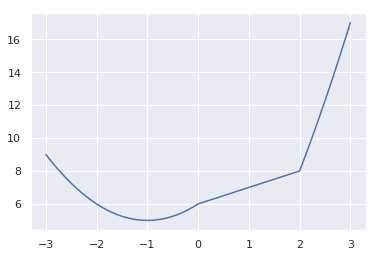

In [24]:
def first(x):
    return x**2 + 2*x + 6

def second(x):
    return x + 6

def third(x):
    return x**2 + 4*x - 4

arg1 = np.linspace(-3, 0, num=30, endpoint=False)
arg2 = np.linspace(0, 2, num=30, endpoint=False)
arg3 = np.linspace(2, 3, num=30)
ans = np.concatenate((first(arg1), second(arg2), third(arg3)))
# print(arg1, arg2, arg3, ans)
sns.set()
plt.plot(np.concatenate((arg1, arg2, arg3)), ans)

**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [87]:
X = np.random.random((10, 10))
mean = np.mean(X, axis=1).reshape(10, 1)
print(np.mean(X-mean, axis=1))

[-3.33066907e-17  1.11022302e-17  1.11022302e-17 -1.11022302e-17
  3.33066907e-17  2.22044605e-17 -9.99200722e-17  5.55111512e-17
  6.66133815e-17 -3.33066907e-17]


**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

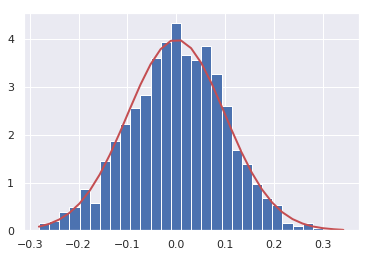

In [40]:
# пример из документации
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
linewidth=2, color='r')
plt.show()

In [86]:
X = np.random.normal(loc=5, scale=2., size=1000)
print(np.mean(X), np.var(X))

5.066359006594701 3.8971766461512214


**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [84]:
x = np.arange(5).reshape(5, 1)
y = np.ones(5).reshape(1, 5)
ans = x.dot(y) + np.arange(5)
# print(x, y, ans)
ans %= 5
ans = np.array(ans, dtype='int32')
print(ans)

[[0 1 2 3 4]
 [1 2 3 4 0]
 [2 3 4 0 1]
 [3 4 0 1 2]
 [4 0 1 2 3]]
